# ***************************************************************************

#
## The code presented in this notebook is pertaining to the following manuscript-
# "A spiking-domain implementation of electronic structure theory"- Aakash Yadav, Daniel Hedman and Hongsik Jeong
## The manuscript has been submitted to IOP Neuromorphic Computing and Engineering
## A.Y. is with CEA-Leti (France) and UNIST (Korea)
## D.H. is with CMCM, IBS (Korea)
## H.J. is with UNIST (Korea)
#

# ***************************************************************************

## Band structure formation for linear chain of atoms: Primitive cell (PC) of lattice constant 'a'

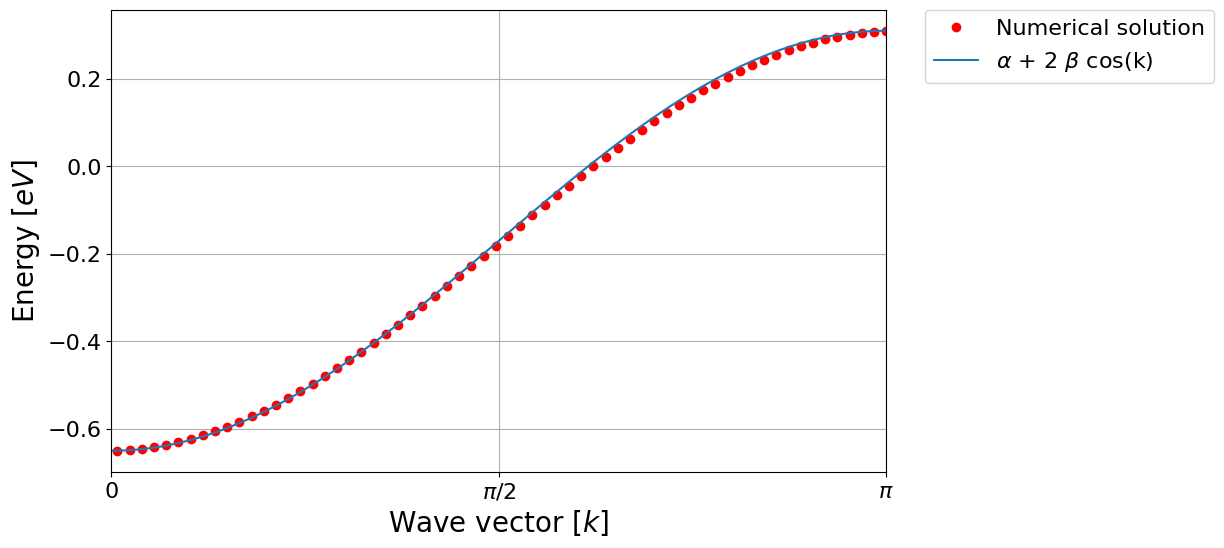

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import basis
import math

# onsite energy
eps = -0.17

# hopping matrix element
t = -0.24

N = 64

k = np.linspace(-np.pi, np.pi, 2*N)
exact = eps + 2.*t*np.cos(k)

def _ket(n, N) : return basis(N, n)
def _bra(n, N) : return basis(N, n).dag()

# construct the Hamiltonian
H  = sum([eps*_ket(n, N)*_bra(n, N) for n in range(0, N)])
H -= sum([t*_ket(n, N)*_bra(n + 1, N) for n in range(0, N - 1)])
H -= sum([t*_ket(n, N)*_bra(n - 1, N) for n in range(1, N)])

# solve it numerically
evals, ekets = H.eigenstates()

# satisfy periodic boundary conditions we need E(-k) = E(k)
numerical = np.concatenate((np.flip(evals, 0), evals), axis=0)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
# plt.ylim(-2, 2)
plt.yticks(fontsize=16)
plt.xticks([-math.pi, -math.pi/2, 0, math.pi/2, math.pi], ['-$\pi$', '-$\pi/2$', '0', '$\pi/2$', '$\pi$'], fontsize=16)
plt.xlim(0, math.pi)
plt.xlabel('Wave vector [$k$]', fontsize=20)
plt.ylabel('Energy [$eV$]', fontsize=20)
plt.plot(k, numerical, 'ro', label='Numerical solution')
plt.plot(k, exact, label=r'$\alpha$ + 2 $\beta$ cos(k)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=16)
plt.grid(True, which="both")
plt.show()

## Band structure formation for linear chain of atoms: Super cell (SC) of lattice constant '2a'

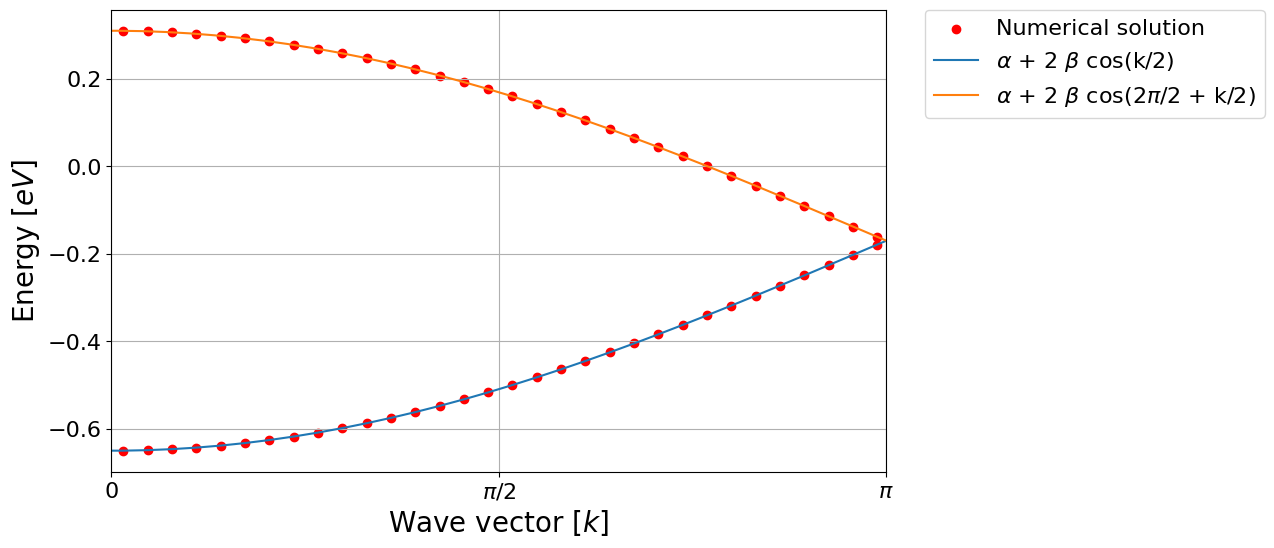

In [4]:
import cmath
from numpy import linalg

ans1, ans2, ans3, ans4 = [], [], [], []

alpha, beta = -0.17, -0.24
k = np.linspace(-4*math.pi, 4*math.pi, 256)

for i in range(0, 256):
#     for j in range(len(Y)):
    tmp = linalg.eig([
        [alpha, beta + beta*cmath.exp(complex(0, k[i]))],
        [beta + beta*cmath.exp(complex(0, -k[i])), alpha]
    ])[0]
    ans1.append(tmp[0].real)
    ans2.append(tmp[1].real)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
# plt.ylim(-1, 0.8)
plt.yticks(fontsize=16)
plt.scatter(k, ans1, c = 'red')
plt.scatter(k, ans2, c = 'red', label = 'Numerical solution')
H = alpha + 2*beta*np.cos(k/2)
plt.plot(k, H, label=r'$\alpha$ + 2 $\beta$ cos(k/2)')
k1 = k + 2*math.pi
plt.plot(k1, alpha + 2*beta*np.cos(math.pi + k1/2), label=r'$\alpha$ + 2 $\beta$ cos(2$\pi$/2 + k/2)')
plt.grid(True, which="both")
plt.xticks([-math.pi, -math.pi/2, 0, math.pi/2, math.pi], ['-$\pi$', '-$\pi/2$', '0', '$\pi/2$', '$\pi$'], fontsize=16)
plt.xlim(0, math.pi)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=16)
plt.xlabel('Wave vector [$k$]', fontsize=20)
plt.ylabel('Energy [$eV$]', fontsize=20)
plt.show()

## Band structure formation for linear chain of atoms: Super cell (SC) of lattice constant '3a'

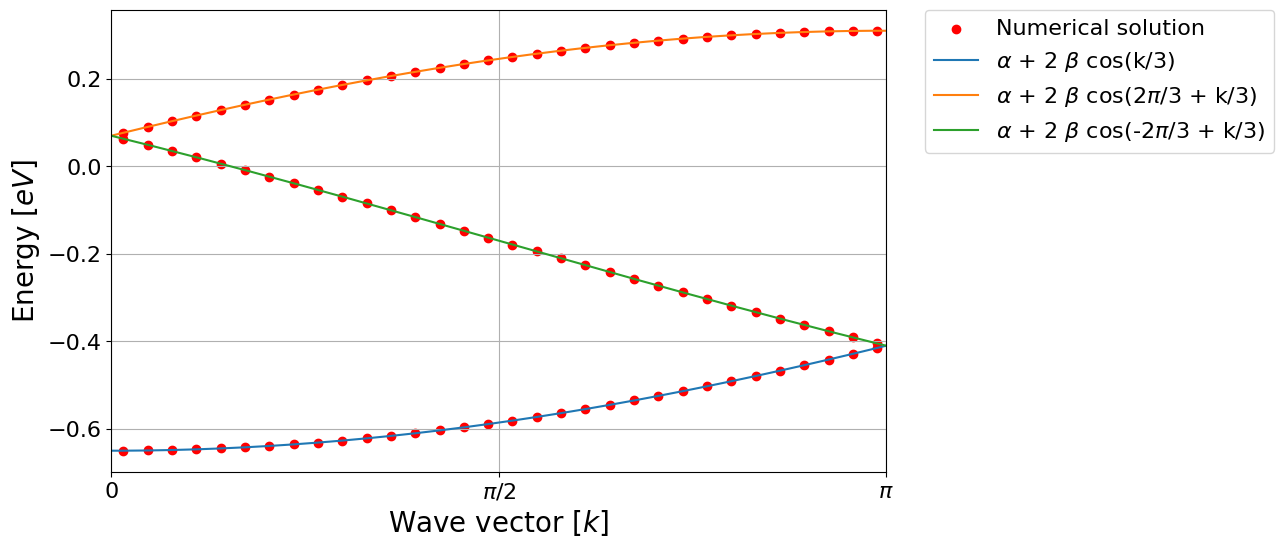

In [5]:
import cmath
from numpy import linalg
import csv

ans1, ans2, ans3, ans4 = [], [], [], []

k = np.linspace(-4*math.pi, 4*math.pi, 256)

for i in range(0, 256):
#     for j in range(len(Y)):
    tmp = linalg.eig([
        [alpha, beta, beta*cmath.exp(complex(0, k[i]))],
        [beta, alpha, beta],
        [beta*cmath.exp(complex(0, -k[i])), beta, alpha]
    ])[0]
    ans1.append(tmp[0].real)
    ans2.append(tmp[1].real)
    ans3.append(tmp[2].real)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
# plt.ylim(-1, 0.8)
plt.yticks(fontsize=16)
plt.scatter(k, ans1, c = 'red')
plt.scatter(k, ans2, c = 'red')
plt.scatter(k, ans3, c = 'red', label = 'Numerical solution')
H = alpha + 2*beta*np.cos(k/3)
plt.plot(k, H, label=r'$\alpha$ + 2 $\beta$ cos(k/3)')
k1 = k + 2*math.pi
plt.plot(k1, alpha + 2*beta*np.cos(2*math.pi/3 + k1/3), label=r'$\alpha$ + 2 $\beta$ cos(2$\pi$/3 + k/3)')
k2 = k - 2*math.pi
plt.plot(k2, alpha + 2*beta*np.cos(-2*math.pi/3 + k2/3), label=r'$\alpha$ + 2 $\beta$ cos(-2$\pi$/3 + k/3)')
plt.grid(True, which="both")
plt.xticks([-math.pi, -math.pi/2, 0, math.pi/2, math.pi], ['-$\pi$', '-$\pi/2$', '0', '$\pi/2$', '$\pi$'], fontsize=16)
plt.xlim(0, math.pi)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=16)
plt.xlabel('Wave vector [$k$]', fontsize=20)
plt.ylabel('Energy [$eV$]', fontsize=20)
plt.show()

## Band structure formation for linear chain of atoms: Super cell (SC) of lattice constant '4a'

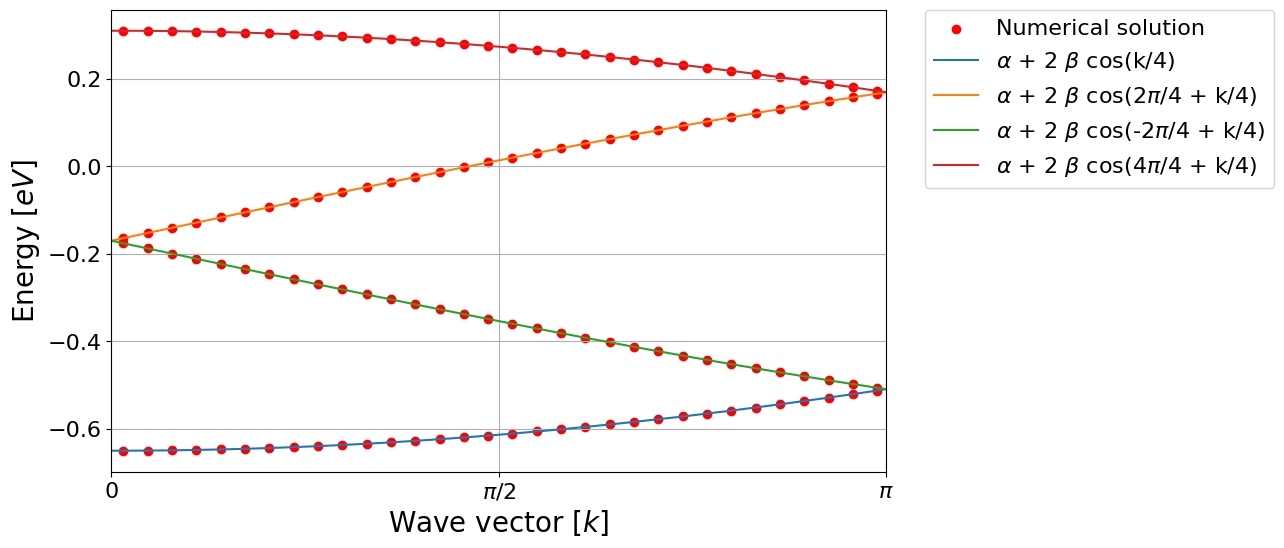

In [6]:
import cmath
from numpy import linalg
import csv

ans1, ans2, ans3, ans4 = [], [], [], []

k = np.linspace(-4*math.pi, 4*math.pi, 256)

for i in range(0, 256):
#     for j in range(len(Y)):
    tmp = linalg.eig([
        [alpha, beta, 0, beta*cmath.exp(complex(0, k[i]))],
        [beta, alpha, beta, 0],
        [0, beta, alpha, beta],
        [beta*cmath.exp(complex(0, -k[i])), 0, beta, alpha]
    ])[0]
    ans1.append(tmp[0].real)
    ans2.append(tmp[1].real)
    ans3.append(tmp[2].real)
    ans4.append(tmp[3].real)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
# plt.ylim(-1, 0.8)
plt.scatter(k, ans1, c = 'red')
plt.scatter(k, ans2, c = 'red')
plt.scatter(k, ans3, c = 'red')
plt.scatter(k, ans4, c = 'red', label = 'Numerical solution')
H = alpha + 2*beta*np.cos(k/4)
plt.plot(k, H, label=r'$\alpha$ + 2 $\beta$ cos(k/4)')
k1 = k + 2*math.pi
plt.plot(k1, alpha + 2*beta*np.cos(2*math.pi/4 + k1/4), label=r'$\alpha$ + 2 $\beta$ cos(2$\pi$/4 + k/4)')
k2 = k - 2*math.pi
plt.plot(k2, alpha + 2*beta*np.cos(-2*math.pi/4 + k2/4), label=r'$\alpha$ + 2 $\beta$ cos(-2$\pi$/4 + k/4)')
k3 = k + 4*math.pi
plt.plot(k3, alpha + 2*beta*np.cos(4*math.pi/4 + k3/4), label=r'$\alpha$ + 2 $\beta$ cos(4$\pi$/4 + k/4)')
plt.grid(True, which="both")
plt.yticks(fontsize=16)
plt.xticks([-math.pi, -math.pi/2, 0, math.pi/2, math.pi], ['-$\pi$', '-$\pi/2$', '0', '$\pi/2$', '$\pi$'], fontsize=16)
plt.xlim(0, math.pi)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=16)
plt.xlabel('Wave vector [$k$]', fontsize=20)
plt.ylabel('Energy [$eV$]', fontsize=20)
plt.show()